In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB

from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to /home/alexis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Import file

In [193]:
df = pd.read_csv("data/cloth.csv").drop("Unnamed: 0", axis = 1)

In [194]:
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


# NaN value

In [195]:
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [196]:
round(df.isna().sum()/len(df)*100,3)

Clothing ID                 0.000
Age                         0.000
Title                      16.222
Review Text                 3.598
Rating                      0.000
Recommended IND             0.000
Positive Feedback Count     0.000
Division Name               0.060
Department Name             0.060
Class Name                  0.060
dtype: float64

In [197]:
df.dropna(subset = ["Review Text", "Division Name", "Class Name"], inplace= True)

In [198]:
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


# Distribution

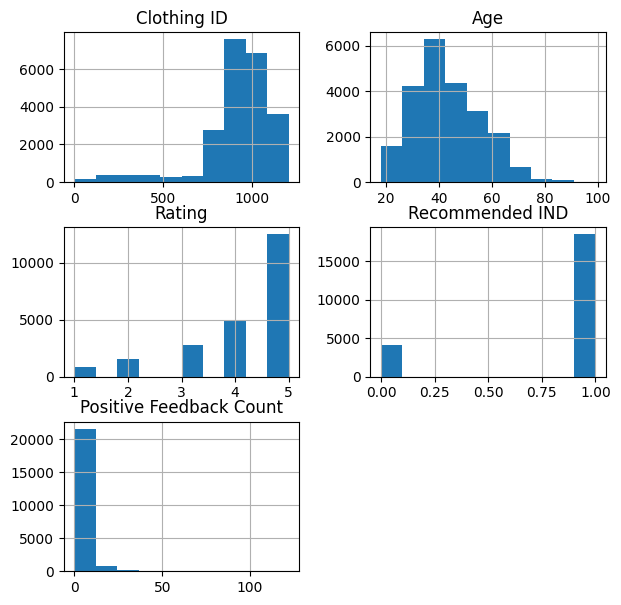

In [199]:
df.hist(figsize=(7,7))
plt.show()

In [200]:
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


# Analyse review Text

## Polary rating

In [201]:
df['Polarity_Rating'] = df['Rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [202]:
df_polar = df.copy()

In [203]:
df_Positive = df[df['Polarity_Rating'] == 'Positive'][0:8000]
df_Neutral = df[df['Polarity_Rating'] == 'Neutral']
df_Negative = df[df['Polarity_Rating'] == 'Negative']

## Preprocessing text

In [204]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [205]:
def replaceElongated(word):
    repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
    repl = r'\1\2\3'
    if wordnet.synsets(word):
        return word
    repl_word = repeat_regexp.sub(repl, word)
    if repl_word != word:      
        return replaceElongated(repl_word)
    else:       
        return repl_word


In [211]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

In [224]:
df['review'] = df['Review Text'].apply(get_text_processing)

In [207]:
main_text = df["review"].apply(replaceElongated)

In [209]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

main_text = main_text.apply(lambda x: tokenizer.tokenize(x))

In [ ]:
main_text = main_text.apply(drop_numbers)

In [212]:
main_text.reset_index(drop = True)

0              Absolutely wonderful silky sexy comfortable
1        Love dres so prety hapened find store im glad ...
2        high hopes dres realy wanted work initialy ord...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flatering due adjustable front tie perfe...
                               ...                        
22623    hapy snag dres great price easy slip flatering...
22624    reminds maternity clothes soft stretchy shiny ...
22625    fit wel top se never would worked im glad able...
22626    bought dres weding sumer cute unfortunately fi...
22627    dres lovely platinum feminine fits perfectly e...
Name: review, Length: 22628, dtype: object

In [213]:
dfff = pd.concat([main_text, df["Polarity_Rating"]], axis= 1)

In [214]:
dfff

,review,Polarity_Rating
0,Absolutely wonderful silky sexy comfortable,Positive
1,Love dres so prety hapened find store im glad ...,Positive
2,high hopes dres realy wanted work initialy ord...,Neutral
3,love love love jumpsuit fun flirty fabulous ev...,Positive
4,shirt flatering due adjustable front tie perfe...,Positive
...,...,...
23481,hapy snag dres great price easy slip flatering...,Positive
23482,reminds maternity clothes soft stretchy shiny ...,Neutral
23483,fit wel top se never would worked im glad able...,Neutral
23484,bought dres weding sumer cute unfortunately fi...,Neutral


## Encoding sentiment

In [188]:
one_hot = pd.get_dummies(df["Polarity_Rating"])
df.drop(["Polarity_Rating"], axis=1, inplace=True)
df = pd.concat([df, one_hot], axis=1)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review,Negative,Neutral,Positive
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful silky sexy comfortable,0,0,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love dress sooo pretty happened find store im ...,0,0,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hopes dress really wanted work initially ...,0,1,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous ev...,0,0,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering due adjustable front tie perf...,0,0,1


## Make baseline

In [189]:
X = df["review"].values
y = df.drop("review", axis=1).values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42,stratify = y
)

ValueError: Input contains NaN

In [ ]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test_vec = vect.transform(X_test)


In [ ]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test_vec)
X_train = X_train.toarray()
X_test_arr = X_test_tf.toarray()

In [ ]:
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(units=5000, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=2500, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation="softmax"))
#opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=["accuracy"])
#early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=2)

In [ ]:
history = model.fit(X_train[:5000,:5000], y_train[:5000], validation_split=0.33, epochs=10, batch_size= 32)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(X_test_arr[:5000,:5000])

In [ ]:
dff = np.column_stack((X_test[:5000],pred))

In [ ]:
df_test = pd.DataFrame(dff, columns = ["review", "negative", "neutral", "positive"])

In [ ]:
df_test.head(50)

In [ ]:
df_test["review"][39]

In [ ]:
y_pred_classes = np.argmax(pred, axis = 1)
y_true = y_test[:5000].astype(int).tolist() # Returns the indices of the maximum values along an axis.
#confusion = confusion_matrix(y_true, y_pred_classes)
print(classification_report(np.argmax(y_true,axis= 1), y_pred_classes))

## Naive bayesian

In [215]:
dfff

,review,Polarity_Rating
0,Absolutely wonderful silky sexy comfortable,Positive
1,Love dres so prety hapened find store im glad ...,Positive
2,high hopes dres realy wanted work initialy ord...,Neutral
3,love love love jumpsuit fun flirty fabulous ev...,Positive
4,shirt flatering due adjustable front tie perfe...,Positive
...,...,...
23481,hapy snag dres great price easy slip flatering...,Positive
23482,reminds maternity clothes soft stretchy shiny ...,Neutral
23483,fit wel top se never would worked im glad able...,Neutral
23484,bought dres weding sumer cute unfortunately fi...,Neutral


In [219]:
cv=CountVectorizer()
train_data,test_data = train_test_split(dfff,train_size=0.66,random_state=0)
X_train = cv.fit_transform(train_data['review'])
y_train = train_data['Polarity_Rating'].replace({"Negative" : 0, "Neutral" : 1, "Positive" : 2})
X_test = cv.transform(test_data['review'])
y_test = test_data['Polarity_Rating'].replace({"Negative" : 0, "Neutral" : 1, "Positive" : 2})

In [220]:
clf = MultinomialNB().fit(X_train,y_train)

In [221]:
nb_pred = clf.predict(X_test)

In [223]:
# y_pred_classes = np.argmax(pred, axis = 1)
y_true = y_test.astype(int).tolist() # Returns the indices of the maximum values along an axis.
#confusion = confusion_matrix(y_true, y_pred_classes)
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.67      0.34      0.45       817
           1       0.44      0.29      0.35       975
           2       0.86      0.97      0.91      5902

    accuracy                           0.82      7694
   macro avg       0.66      0.53      0.57      7694
weighted avg       0.79      0.82      0.79      7694



## Nayve bayesian / recommended

In [229]:
nb_rec = pd.concat([dfff["review"], df["Recommended IND"]], axis = 1)

In [230]:
nb_rec

,review,Recommended IND
0,Absolutely wonderful silky sexy comfortable,1
1,Love dres so prety hapened find store im glad ...,1
2,high hopes dres realy wanted work initialy ord...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flatering due adjustable front tie perfe...,1
...,...,...
23481,hapy snag dres great price easy slip flatering...,1
23482,reminds maternity clothes soft stretchy shiny ...,1
23483,fit wel top se never would worked im glad able...,0
23484,bought dres weding sumer cute unfortunately fi...,1


In [231]:
cv=CountVectorizer()
train_data,test_data = train_test_split(nb_rec,train_size=0.66,random_state=0)
X_train = cv.fit_transform(train_data['review'])
y_train = train_data['Recommended IND']
X_test = cv.transform(test_data['review'])
y_test = test_data['Recommended IND']

In [232]:
clf = MultinomialNB().fit(X_train,y_train)
nb_pred = clf.predict(X_test)

# y_pred_classes = np.argmax(pred, axis = 1)
y_true = y_test.astype(int).tolist() # Returns the indices of the maximum values along an axis.
#confusion = confusion_matrix(y_true, y_pred_classes)
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.75      0.61      0.67      1427
           1       0.91      0.95      0.93      6267

    accuracy                           0.89      7694
   macro avg       0.83      0.78      0.80      7694
weighted avg       0.88      0.89      0.89      7694

